In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')
import pandas as pd
import numpy as np
# 경고문구 제거 설정
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import missingno as msno

In [ ]:
#LOT 물량 정보
workload = pd.read_excel('../../data/LOT 물량.xlsx')
#시계열 설비데이터
operation = pd.read_csv('../../data/PRODUCTION_TREND.csv', encoding='CP949')
#CCM 검사결과
ccm = pd.read_excel('../../data/CCM 측정값.xlsx')

# 데이터 전처리및 EDA

## 1. 물류 데이터

1.기본 정보

In [ ]:
workload.head()

,EXT1_QTY(투입중량 (KG)),EXT2_QTY (액량 (LITER)),PRODT_ORDER_NO,JOB_CD,PROCESS_CD,단위중량,염색 가동 길이
0,245.6,4000,F2111300008,F12-1203,F12-1203,590,120.0
1,71.4,600,F2111300012,F12-1203,F12-1203,445,123.0
2,98.3,4000,F2111300020,F12-1203,F12-1203,0,460.0
3,97.0,4000,F2111300021,F12-1203,F12-1203,0,452.0
4,40.6,600,F2111300027,F12-1203,F12-1203,445,86.0


In [ ]:
workload	=	workload[['PRODT_ORDER_NO',	'JOB_CD',	'EXT1_QTY(투입중량 (KG))',	'EXT2_QTY (액량 (LITER))',	'단위중량',	'염색 가동 길이','PROCESS_CD']]

In [ ]:
workload.columns	=	['LOT번호',	'공정코드',	'투입중량(kg)',	'투입액량(L)',	'단위중량(kg)',	'염색길이(m)','공정코드_진행']

In [ ]:
workload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOT번호     2150 non-null   object 
 1   공정코드      2150 non-null   object 
 2   투입중량(kg)  2150 non-null   float64
 3   투입액량(L)   2150 non-null   int64  
 4   단위중량(kg)  2150 non-null   int64  
 5   염색길이(m)   2150 non-null   float64
 6   공정코드_진행   2150 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 117.7+ KB


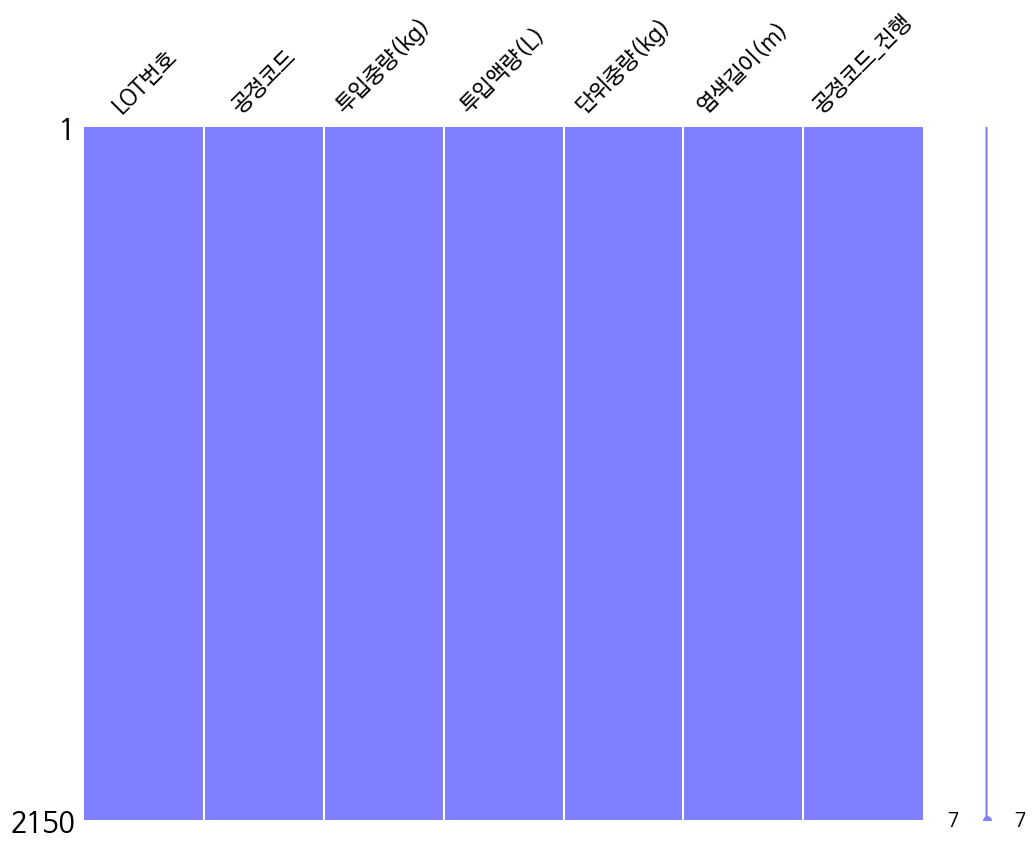

In [ ]:
plt.rc('font', family='NanumBarunGothic')

msno.matrix(workload, color=(0.5, 0.5, 1), figsize=(12, 9))
plt.xticks(ha='center')
plt.show()

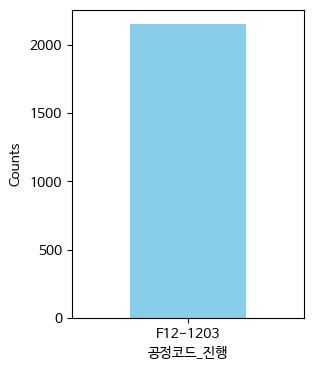

In [ ]:
# 공정코드 컬럼의 고유값 및 그 빈도수 계산
value_counts = workload['공정코드_진행'].value_counts()

plt.figure(figsize=(3, 4))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('공정코드_진행')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 확인 결과 PROCESS_CD가 유일한 중복된 값을 가지고 있어서 삭제한다.
workload.drop(['공정코드_진행'], axis=1, inplace=True)

In [ ]:
workload.head(1)

,LOT번호,공정코드,투입중량(kg),투입액량(L),단위중량(kg),염색길이(m)
0,F2111300008,F12-1203,245.6,4000,590,120.0


In [ ]:
workload.describe()

,투입중량(kg),투입액량(L),단위중량(kg),염색길이(m)
count,2150.000000,2150.000000,2150.000000,2150.000000
mean,146.882963,2460.372093,390.440000,432.928567
std,85.305814,1338.933356,194.841062,522.604399
min,0.000000,600.000000,0.000000,1.000000
25%,75.850000,1000.000000,234.000000,60.000000
50%,150.600000,2000.000000,400.000000,262.000000
75%,190.750000,4000.000000,560.000000,500.000000
max,504.200000,4000.000000,1150.000000,1600.000000


2.데이터 전처리


방법 Python

2.1 중복데이터 처리

In [ ]:
workload.duplicated(keep=False).sum()

38

In [ ]:
workload[workload.duplicated(keep=False)]

,LOT번호,공정코드,투입중량(kg),투입액량(L),단위중량(kg),염색길이(m)
8,F2111300043,F12-1203,193.6,4000,146,1600.0
9,F2111300043,F12-1203,193.6,4000,146,1600.0
251,F2112240047,F12-1203,102.6,1000,380,300.0
252,F2112240047,F12-1203,102.6,1000,380,300.0
467,F2201180073,F12-1203,102.1,4000,190,500.0
468,F2201180073,F12-1203,102.1,4000,190,500.0
706,F2202180008,F12-1203,158.2,2000,560,270.0
707,F2202180008,F12-1203,158.2,2000,560,270.0
847,F2203080141,F12-1203,286.8,4000,560,450.0
848,F2203080141,F12-1203,286.8,4000,560,450.0


중복된 데이터는 모든 결과값이 똑같은 데이터이기때문에 삭제한다.

In [ ]:
workload2	=	workload[~workload.duplicated(keep='first')]

In [ ]:
workload2.reset_index(drop=True,	inplace=True)
workload2.duplicated().sum()

0

In [ ]:
#	LOT번호가 유일한 값이므로, LOT번호 순으로 정렬
workload2.sort_values(by='LOT번호',	ascending=True,	ignore_index=True,	inplace=True)

In [ ]:
(workload2.groupby('LOT번호').size()	>	1).sum()

2

In [ ]:
workload2[workload2.duplicated(subset='LOT번호',	keep=False)]

,LOT번호,공정코드,투입중량(kg),투입액량(L),단위중량(kg),염색길이(m)
1646,F2207120068,F12-1203,279.0,3000,686,500.0
1647,F2207120068,F12-1203,279.0,3000,686,1.0
1938,F2209010042,F12-1203,191.8,4000,146,1600.0
1939,F2209010042,F12-1203,191.8,4000,146,1.0


**LOT번호 기준 중복데이터 삭제**

LOT번호가 중복된 데이터중에서 염색길이가 1m인 데이터는 수집오류에 해당되기 때문에 삭제한다.

In [ ]:
#염색길이가 오류인 데이터는 삭제
workload3	=	workload2.drop([1647,	1939],	axis=0)
workload3.reset_index(drop=True,	inplace=True)

In [ ]:
# 마지막 검사차수 추출 전후 데이터 개수 비교
print(workload.shape)
print(workload3.shape)

(2150, 6)
(2127, 6)


In [ ]:
(workload3.groupby('LOT번호').size()	>	1).sum()

0

## 2. 설비 데이터

1.기본정보 확인

In [ ]:
#설비데이터	확인
operation.head()

,LOT_NO,WC_CD,WC_CNT,SEQ_NO,PGM_ID,RESOURCE_CD,CR_TEMP,TRD_TEMP_SP,TRD_TEMP_PV,TRD_SPEED1,TRD_SPEED2,TRD_SPEED3,TRD_SPEED4,INSRT_DT,PRODUCTION_RESULT_iD
0,F2112280005,F12-1203,1,1,B9700,FCM04,30,30.0,14.5,0,0,0,0,2022-01-03,NaN
1,F2112280005,F12-1203,1,2,B9700,FCM04,30,30.0,16.1,0,0,0,0,2022-01-03,NaN
2,F2112280005,F12-1203,1,3,B9700,FCM04,30,30.0,19.6,111,1,112,1,2022-01-03,NaN
3,F2112280005,F12-1203,1,4,B9700,FCM04,30,30.0,20.0,111,1,112,1,2022-01-03,NaN
4,F2112280005,F12-1203,1,5,B9700,FCM04,30,30.0,19.9,111,1,112,1,2022-01-03,NaN


In [ ]:
operation	=	operation[['LOT_NO',	'WC_CD',	'RESOURCE_CD',	'INSRT_DT',	'SEQ_NO',	'CR_TEMP',	'TRD_TEMP_SP',	'TRD_TEMP_PV',	'TRD_SPEED1',	'TRD_SPEED2',	'TRD_SPEED3',	'TRD_SPEED4','WC_CNT','PGM_ID','PRODUCTION_RESULT_iD']]

In [ ]:
operation.columns	=	[	'LOT번호',	'공정코드',	'설비번호',	'공정일시',	'공정진행시간',	'목표온도',	'지시온도',	'진행온도',	'포속1',	'포속2',	'포속3',	'포속4','작업횟수','프로그램코드','공정결과코드']

In [ ]:
operation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119545 entries, 0 to 2119544
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   LOT번호   object 
 1   공정코드    object 
 2   설비번호    object 
 3   공정일시    object 
 4   공정진행시간  int64  
 5   목표온도    int64  
 6   지시온도    float64
 7   진행온도    float64
 8   포속1     int64  
 9   포속2     int64  
 10  포속3     int64  
 11  포속4     int64  
 12  작업횟수    int64  
 13  프로그램코드  object 
 14  공정결과코드  object 
dtypes: float64(2), int64(7), object(6)
memory usage: 242.6+ MB


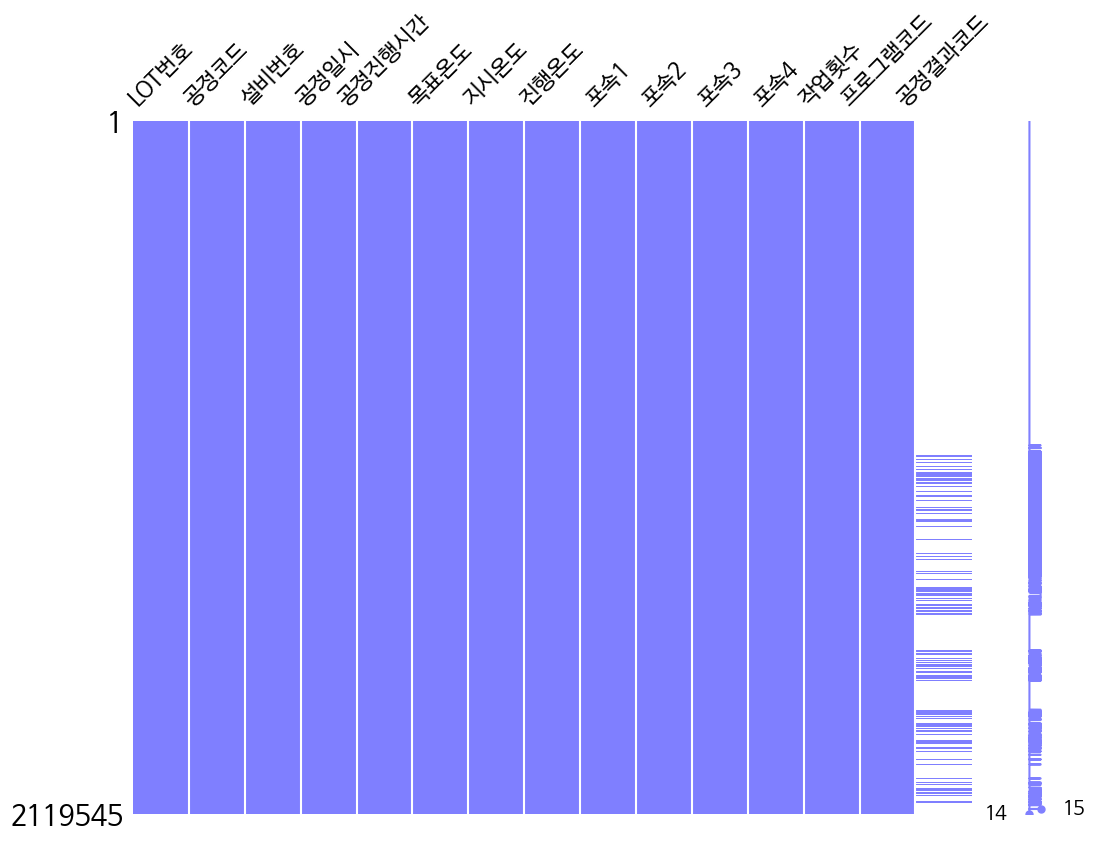

In [ ]:
plt.rc('font', family='NanumBarunGothic')

msno.matrix(operation, color=(0.5, 0.5, 1), figsize=(12, 9))
plt.xticks(ha='center')
plt.show()

In [ ]:
#공정결과코드는 결측데이터가 많기 때문에 삭제한다.
operation.drop(['공정결과코드'], axis=1, inplace=True)

품질 예측 모델에 기여하지 않음, 품질(종속변수)과 직접적인 관련성이 낮음

In [ ]:
operation.drop(['프로그램코드','작업횟수'], axis=1, inplace=True)

In [ ]:
operation.head(5)

,LOT번호,공정코드,설비번호,공정일시,공정진행시간,목표온도,지시온도,진행온도,포속1,포속2,포속3,포속4
0,F2112280005,F12-1203,FCM04,2022-01-03,1,30,30.0,14.5,0,0,0,0
1,F2112280005,F12-1203,FCM04,2022-01-03,2,30,30.0,16.1,0,0,0,0
2,F2112280005,F12-1203,FCM04,2022-01-03,3,30,30.0,19.6,111,1,112,1
3,F2112280005,F12-1203,FCM04,2022-01-03,4,30,30.0,20.0,111,1,112,1
4,F2112280005,F12-1203,FCM04,2022-01-03,5,30,30.0,19.9,111,1,112,1


In [ ]:
operation.describe()

,공정진행시간,목표온도,지시온도,진행온도,포속1,포속2,포속3,포속4
count,2.119545e+06,2.119545e+06,2.119545e+06,2.119545e+06,2.119545e+06,2.119545e+06,2.119545e+06,2.119545e+06
mean,1.642413e+02,5.694867e+00,6.800768e+01,6.948227e+01,1.013029e+02,1.159574e+02,9.125004e+01,8.993948e+01
std,1.240647e+02,1.849810e+01,3.607976e+01,3.411583e+01,4.119714e+02,2.076070e+02,3.883704e+02,2.478388e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.300000e+01,0.000000e+00,3.000000e+01,3.720000e+01,2.300000e+01,1.100000e+01,0.000000e+00,0.000000e+00
50%,1.470000e+02,0.000000e+00,7.000000e+01,6.950000e+01,6.500000e+01,7.200000e+01,6.100000e+01,4.600000e+01
75%,2.270000e+02,0.000000e+00,9.760000e+01,9.730000e+01,9.900000e+01,1.560000e+02,9.900000e+01,1.220000e+02
max,1.381000e+03,1.380000e+02,1.380000e+02,1.525000e+02,9.998000e+03,9.027000e+03,9.997000e+03,9.058000e+03


2.데이터 전처리


방법 Python

2.1 중복 데이터 처리

In [ ]:
operation.duplicated(keep=False).sum()

21600

In [ ]:
 #	LOT번호+공정진행시간	순으로	데이터를 정렬
operation.sort_values(by=['LOT번호',	'공정진행시간'],	ascending=True,	inplace=True,	ignore_index=True)

In [ ]:
operation[operation.duplicated(keep=False)]

,LOT번호,공정코드,설비번호,공정일시,공정진행시간,목표온도,지시온도,진행온도,포속1,포속2,포속3,포속4
9165,F2112100004,F12-1203,FCM11,2022-01-03,1,30,30.0,28.2,0,0,0,0
9166,F2112100004,F12-1203,FCM11,2022-01-03,1,30,30.0,28.2,0,0,0,0
9167,F2112100004,F12-1203,FCM11,2022-01-03,2,30,30.0,25.5,0,0,0,0
9168,F2112100004,F12-1203,FCM11,2022-01-03,2,30,30.0,25.5,0,0,0,0
9169,F2112100004,F12-1203,FCM11,2022-01-03,3,30,30.0,23.0,37,1,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1820212,L2206270021,L12-1203,LCM53,2022-07-01,44,20,0.0,0.0,0,0,0,0
1820214,L2206270021,L12-1203,LCM53,2022-07-01,45,20,0.0,0.0,0,0,0,0
1820215,L2206270021,L12-1203,LCM53,2022-07-01,45,20,0.0,0.0,0,0,0,0
2113220,L2210120013,L12-1203,LCM55,2022-10-19,15,20,20.0,27.5,0,0,0,0


중복된 데이터의 나머지 값이 똑같기 때문에, 첫번째 데이터만 남기고 나머지 데이터를 삭제한다.

In [ ]:
operation2	=	operation[~operation.duplicated(keep='first')]
operation2.reset_index(drop=True,	inplace=True)
operation2.duplicated().sum()

0

In [ ]:
operation2.sort_values(by=['LOT번호',	'공정진행시간'],	ascending=True,	inplace=True,	ignore_index=True)

In [ ]:
(operation2.groupby(['LOT번호',	'공정코드',	'공정진행시간']).size()	>1).sum()

8841

In [ ]:
operation2[operation2.duplicated(subset=['LOT번호',	'공정코드',	'공정진행시간'],	keep=False)].head(5)

,LOT번호,공정코드,설비번호,공정일시,공정진행시간,목표온도,지시온도,진행온도,포속1,포속2,포속3,포속4
43597,F2112270335추가,1,FCM06,2022-01-13,1,30,30.0,65.6,0,0,0,0
43598,F2112270335추가,1,FCM06,2022-01-13,1,30,30.0,66.8,0,0,0,0
43599,F2112270335추가,1,FCM06,2022-01-13,2,30,0.0,0.0,0,0,0,0
43600,F2112270335추가,1,FCM06,2022-01-13,2,30,50.0,64.4,0,0,0,0
43601,F2112270335추가,1,FCM06,2022-01-13,3,70,0.0,0.0,0,0,0,0


**LOT번호+공정시간 기준 중복데이터 삭제**

중복된 데이터의 첫번째 값을 보면, 지시온도와 진행온도가 모두 0이때문에 수집오류라고 생각한다. 따라서 첫번째 부분을 모두 삭제하고, 마지막 부분만 사용한다.

In [ ]:
operation3	=	operation2[~operation2.duplicated(subset=['LOT번호',	'공정코드',	'공정진행시간'],	keep='last')]
operation3.reset_index(drop=True,	inplace=True)

In [ ]:
print(operation.shape)
print(operation3.shape)

(2119545, 12)
(2099361, 12)


In [ ]:
(operation3.groupby(['LOT번호',	'공정코드',	'공정진행시간']).size()	>1).sum()

0

## 3. CCM 데이터

1.기본정보 확인

In [ ]:
ccm.head()

,lot_no,seq,oper_id,염색 색차 DL,염색 색차 DA,염색 색차 DB,염색 색차 DC,염색 색차 DH,염색 색차 DE
0,F2002240067,0,염색,1.402431,-0.079870,0.255513,0.063653,-0.260028,1.427754
1,F2003120058,0,염색,-0.043186,-0.021964,0.614762,0.032673,-0.614286,0.616669
2,F2006160123,0,원단검사,12.724530,-1.963228,-1.810259,1.940723,-1.834361,13.001730
3,F2009030093,0,원단검사,0.243153,0.251606,-3.862172,3.830362,-0.554988,3.877990
4,F2009030093,0,원단검사,0.673786,0.199348,-3.894216,3.854515,-0.589382,3.957100


In [ ]:
ccm = ccm[['lot_no', 'seq', 'oper_id', '염색 색차 DE','염색 색차 DL','염색 색차 DA','염색 색차 DB','염색 색차 DC','염색 색차 DH']]

In [ ]:
ccm.columns = ['LOT번호', '검사차수', '작업명','염색 색차 DE','염색 색차 DL','염색 색차 DA','염색 색차 DB','염색 색차 DC','염색 색차 DH']

In [ ]:
ccm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOT번호     614 non-null    object 
 1   검사차수      614 non-null    object 
 2   작업명       614 non-null    object 
 3   염색 색차 DE  614 non-null    float64
 4   염색 색차 DL  614 non-null    float64
 5   염색 색차 DA  614 non-null    float64
 6   염색 색차 DB  614 non-null    float64
 7   염색 색차 DC  614 non-null    float64
 8   염색 색차 DH  614 non-null    float64
dtypes: float64(6), object(3)
memory usage: 43.3+ KB


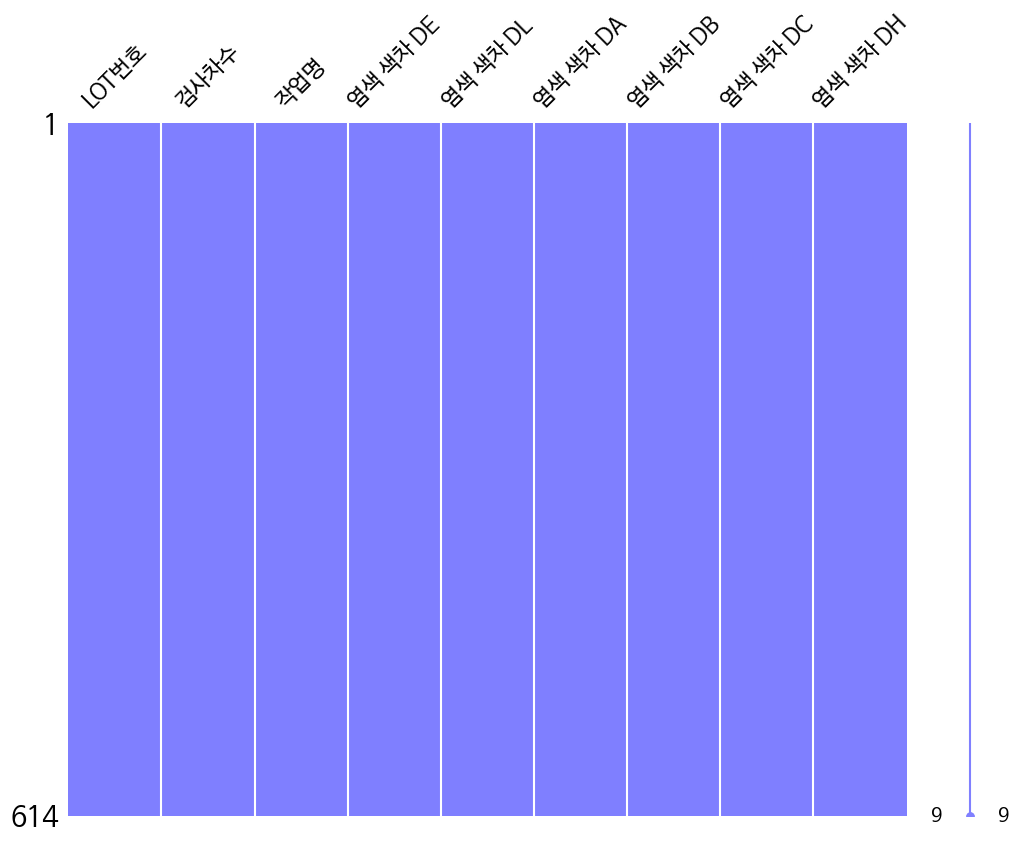

In [ ]:
plt.rc('font', family='NanumBarunGothic')

msno.matrix(ccm, color=(0.5, 0.5, 1), figsize=(12, 9))
plt.xticks(ha='center')
plt.show()

염색 색차 DE가 이미 DL, DA, DB, DC, DH의 정보를 통합적으로 포함하고 있는 지표이다. 따라서 염색 색차 DE만 남기고 나머지 변수들을 제거한다.

In [ ]:
#데이터 삭제
ccm = ccm[['LOT번호', '검사차수', '작업명', '염색 색차 DE']]

In [ ]:
ccm.head(1)

,LOT번호,검사차수,작업명,염색 색차 DE
0,F2002240067,0,염색,1.427754


In [ ]:
ccm.groupby('작업명').describe()

염색 색차 DE                                                               \
        count      mean        std       min       25%       50%       75%   
작업명                                                                          
염색      258.0  7.370115  12.421090  0.015057  0.713638  1.477504  4.035216   
원단검사    356.0  3.100112   8.095812  0.088128  0.744514  1.349430  2.690986   

                
           max  
작업명             
염색    35.60790  
원단검사  93.47859

2.데이터 전처리


방법 Python

2.1. 데이터 형식 통일

In [ ]:
ccm[ccm['LOT번호'].str.islower()]

,LOT번호,검사차수,작업명,염색 색차 DE
125,f2109240189,0,원단검사,0.654607
127,f2109240190,0,원단검사,0.277524
274,f2202160031,0,원단검사,0.649170
275,f2202160033,0,원단검사,1.815297
284,f2202210075,0,원단검사,0.838446
287,f2202210107,0,원단검사,5.252130
288,f2202210108,0,원단검사,3.457263
289,f2202500013,0,원단검사,0.927708
290,f2203020167,0,원단검사,3.173388
291,f2203020173,0,원단검사,1.716800


In [ ]:
#형식통일일
ccm['LOT번호'] = ccm['LOT번호'].str.capitalize()
ccm['LOT번호'].str.islower().sum()

0

2.2 중복데이터 처리

In [ ]:
ccm.duplicated(keep=False).sum()

44

In [ ]:
ccm[ccm.duplicated(keep=False)]

,LOT번호,검사차수,작업명,염색 색차 DE
170,F2111010033,0,염색,34.27313
171,F2111010033,0,염색,34.27313
172,F2111010033,1,염색,34.30603
173,F2111010033,1,염색,34.30603
174,F2111010033,1,염색,34.10254
175,F2111010033,1,염색,34.10254
184,F2111100017,0,염색,35.04726
185,F2111100017,0,염색,35.04726
187,F2111100017,1,염색,34.90097
188,F2111100017,1,염색,34.90097


In [ ]:
ccm2 = ccm[~ccm.duplicated(keep='first')]
ccm2.reset_index(drop=True, inplace=True)
ccm2.duplicated().sum()

0

데이터셋#3 CCM데이터는 ‘LOT번호-검사차수’ 하나당 여러 검사결과 값이 있음



In [ ]:
ccm2.sort_values(by=['LOT번호', '검사차수'], ascending=True, ignore_index=True, inplace=True)

In [ ]:
(ccm2.groupby(['LOT번호', '검사차수']).size() >1).sum()

52

In [ ]:
# 유일한 값인 LOT번호+검사차수 기준으로 중복 데이터 확인
ccm2[ccm2.duplicated(subset=['LOT번호', '검사차수'], keep=False)].head(20)

,LOT번호,검사차수,작업명,염색 색차 DE
3,F2009030093,0,원단검사,3.877990
4,F2009030093,0,원단검사,3.957100
21,F2104220009,0,원단검사,3.603126
22,F2104220009,0,원단검사,3.591169
30,F2105070082,1,염색,1.024476
31,F2105070082,1,염색,0.507672
94,F2108310449,1,염색,3.246939
95,F2108310449,1,염색,4.687436
97,F2109010049,0,염색,0.466960
98,F2109010049,0,염색,1.156357


**LOT+ 검사차수 기준 중복데이터 삭제**

CCM 데이터(데이터셋#3)는‘LOT번호’-‘검사차수’별로 구분이 되어있지만, 주요 독립변수인 시계열 설비데이터(데이터셋#2) 는 ‘LOT번호’로만 구분되어 있다. 이 두 데이터를 결합하기 위해서는 설비데이터를 CCM데이터와 같이 ‘검사차수’ 기준으로 구분할 수 있어야 하는데, 주어진 데이터는 ‘LOT번호’ 기준으로만 사용할 수밖에 없으므로, 데이터셋 결합 을 위해서는 CCM데이터도 ‘LOT번호’ 기준으로만 사용할 수밖에 없다. 이에 따라, ‘groupby()’ 함수와 ‘last()’ 함수를 통해 CCM데이터는 각 ‘LOT번호’의 마지막 검사차수 값만 추출해서 사용한다.


In [ ]:
ccm3 = ccm2.groupby(['LOT번호']).last()
ccm3.reset_index(drop=False, inplace=True)
ccm3

,LOT번호,검사차수,작업명,염색 색차 DE
0,F2002240067,0,염색,1.427754
1,F2003120058,0,염색,0.616669
2,F2006160123,0,원단검사,13.001730
3,F2009030093,0,원단검사,3.957100
4,F2009050181,0,염색,1.034338
...,...,...,...,...
422,F2209080008,1,염색,0.323110
423,F2209130036,0,원단검사,4.567289
424,F2209130097,0,원단검사,0.784885
425,F2209130098,0,원단검사,0.323461


In [ ]:
# 마지막 검사차수 추출 전후 데이터 개수 비교
print(ccm.shape)
print(ccm3.shape)

(614, 4)
(427, 4)


In [ ]:
ccm3.duplicated(subset=['LOT번호', '검사차수']).sum()

0

## 4. 염색량 관련 파생변수 생성


투입중량/길이, 투입중량/액량 변수 생성

In [ ]:
workload4 = workload3.copy()
# 염색길이 대비 투입중량 파생변수 생성
workload4['투입중량/길이'] = workload4['투입중량(kg)'] / workload4['염색길이(m)']
# 투입액량 대비 투입중량 파생변수 생성
workload4['투입중량/액량'] = workload4['투입중량(kg)'] / workload4['투입액량(L)']

공정진행시간(%) 파생변수 생성

In [ ]:

operation4_list = []

for name, group in operation3.groupby('LOT번호'):
    group.sort_values(by=['공정진행시간'], ascending=True, inplace=True, ignore_index=True)


    group['공정진행시간(%)'] = round(group['공정진행시간'] / group['공정진행시간'].max() * 100, 2)

    operation4_list.append(group)


operation4 = pd.concat(operation4_list, ignore_index=True)

In [ ]:
operation4

,LOT번호,공정코드,설비번호,공정일시,공정진행시간,목표온도,지시온도,진행온도,포속1,포속2,포속3,포속4,공정진행시간(%)
0,F2004270020,F12-1203,FCM12,2022-05-18,1,30,30.0,31.9,0,0,0,0,0.22
1,F2004270020,F12-1203,FCM12,2022-05-18,2,30,30.0,30.7,45,1,0,0,0.44
2,F2004270020,F12-1203,FCM12,2022-05-18,3,30,30.0,30.2,32,2,0,0,0.66
3,F2004270020,F12-1203,FCM12,2022-05-18,4,30,30.0,29.8,32,4,0,0,0.88
4,F2004270020,F12-1203,FCM12,2022-05-18,5,30,30.0,29.4,32,4,0,0,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099356,L2210180007,L12-1203,LCM55,2022-10-19,277,0,20.0,28.0,0,0,0,0,98.58
2099357,L2210180007,L12-1203,LCM55,2022-10-19,278,0,20.0,28.0,0,0,0,0,98.93
2099358,L2210180007,L12-1203,LCM55,2022-10-19,279,0,20.0,26.5,0,0,0,0,99.29
2099359,L2210180007,L12-1203,LCM55,2022-10-19,280,0,20.0,26.7,0,0,0,0,99.64


In [ ]:
operation4 = operation4[['LOT번호', '공정코드', '설비번호', '공정진행시간(%)', '목표온도', '지시온도', '진행온도', '포속1', '포속2', '포속3', '포속4']]

## 5. 테이블 통합 (42p)

In [ ]:
# LOT 물량 데이터 + CCM 데이터 결합 - ‘LOT번호’ 기준
df = ccm3.merge(workload4, how='inner', on='LOT번호')
# 설비데이터+ 그 외 데이터(배치성) 결합 - 'LOT번호', '공정코드' 기준
df2 = df.merge(operation4, how='inner', on=['LOT번호', '공정코드'])
df2.head()

,LOT번호,검사차수,작업명,염색 색차 DE,공정코드,투입중량(kg),투입액량(L),단위중량(kg),염색길이(m),투입중량/길이,투입중량/액량,설비번호,공정진행시간(%),목표온도,지시온도,진행온도,포속1,포속2,포속3,포속4
0,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.19,30,30.0,10.9,0,0,0,0
1,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.39,30,30.0,10.3,16,1,16,1
2,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.58,30,30.0,10.3,68,2,16,1
3,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.77,30,30.0,10.2,69,3,138,2
4,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.97,30,30.0,10.8,69,3,138,2


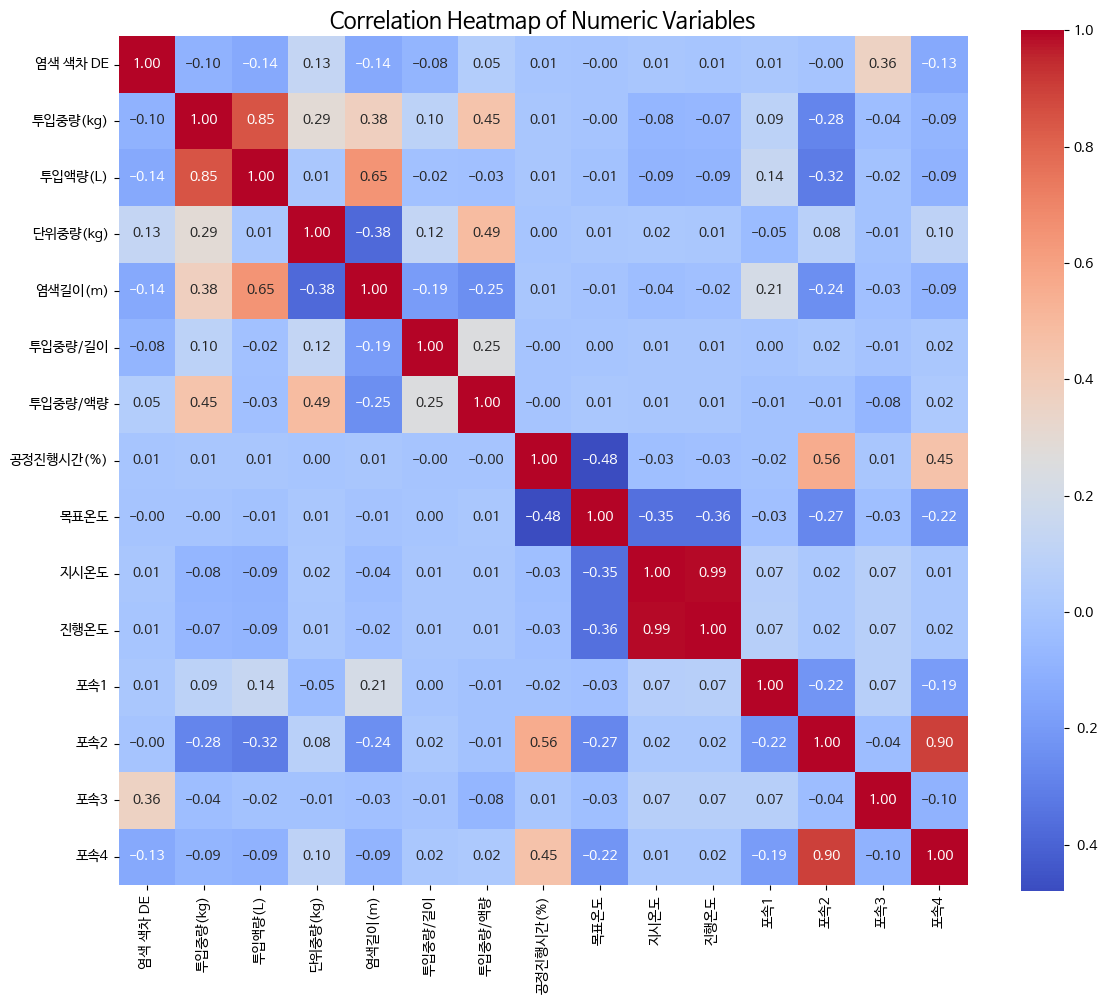

In [ ]:
numeric_df2 = df2.select_dtypes(include=['number'])

correlation_matrix = numeric_df2.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)


plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)

plt.tight_layout()
plt.show()


상관계수가 지나치게 높은 변수를 제거합니다.

In [ ]:
df2 = df2.drop(columns=['포속2', '지시온도'])

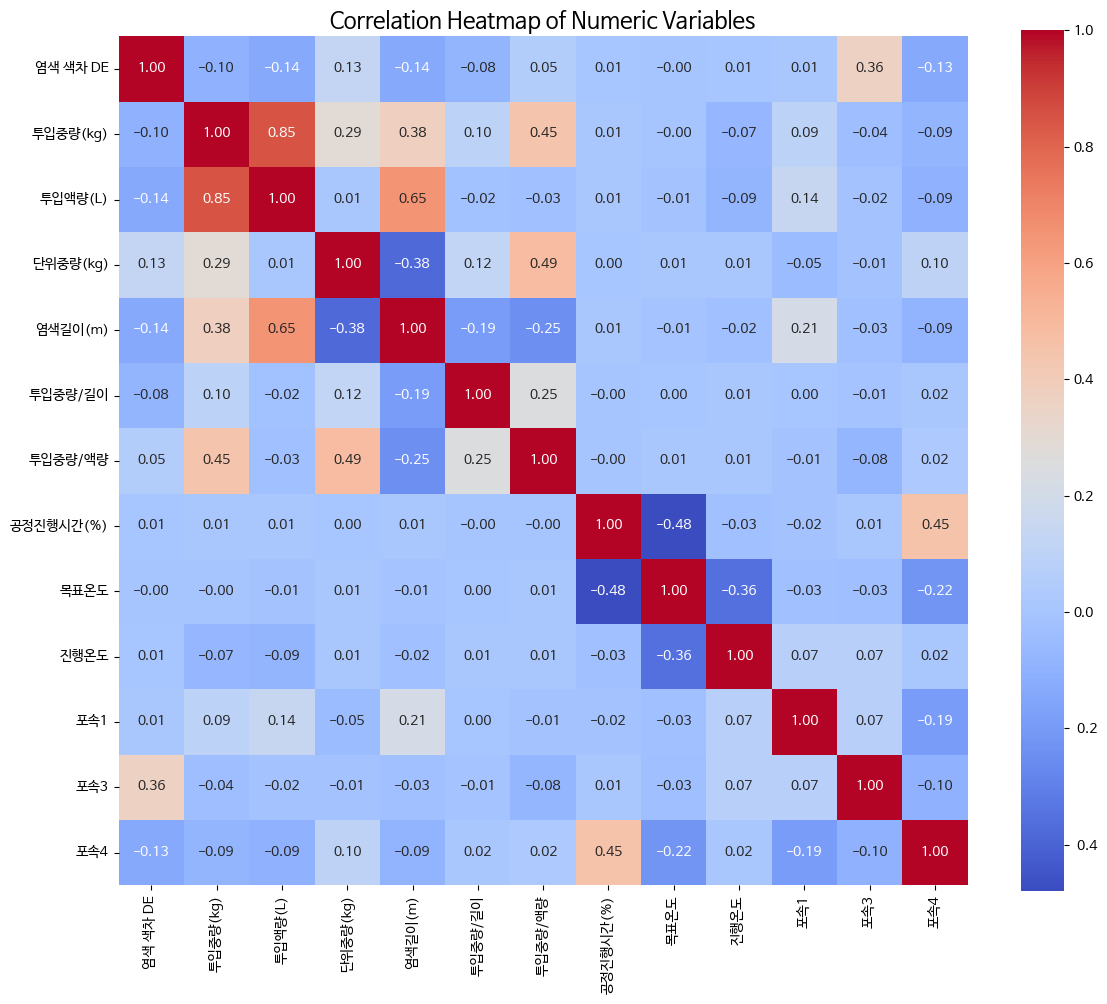

In [ ]:
numeric_df2 = df2.select_dtypes(include=['number'])


correlation_matrix = numeric_df2.corr()


plt.figure(figsize=(12, 10))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)


plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
print('SET1 데이터 크기: {}'.format(workload4.shape))
print('SET2 데이터 크기: {}'.format(operation4.shape))
print('SET3 데이터 크기: {}'.format(ccm3.shape))
print('\nSET1+SET3 데이터 크기: {}'.format(df.shape))
print('SET1+SET2+SET3 데이터 크기: {}'.format(df2.shape))

SET1 데이터 크기: (2127, 8)
SET2 데이터 크기: (2099361, 11)
SET3 데이터 크기: (427, 4)

SET1+SET3 데이터 크기: (127, 11)
SET1+SET2+SET3 데이터 크기: (34410, 18)


In [ ]:
df2 = df2[['LOT번호', '검사차수', '작업명', '공정코드', '설비번호',
'단위중량(kg)', '투입중량(kg)', '투입액량(L)', '염색길이(m)', '투입중량/길이', '투입중량/액량',
'공정진행시간(%)', '목표온도', '진행온도', '포속1', '포속3', '포속4',
'염색 색차 DE']]

In [ ]:
df2.head(3)

,LOT번호,검사차수,작업명,공정코드,설비번호,단위중량(kg),투입중량(kg),투입액량(L),염색길이(m),투입중량/길이,투입중량/액량,공정진행시간(%),목표온도,진행온도,포속1,포속3,포속4,염색 색차 DE
0,F2201280039,0,원단검사,F12-1203,FCM08,324,44.6,1000,41.0,1.087805,0.0446,0.19,30,10.9,0,0,0,0.753096
1,F2201280039,0,원단검사,F12-1203,FCM08,324,44.6,1000,41.0,1.087805,0.0446,0.39,30,10.3,16,16,1,0.753096
2,F2201280039,0,원단검사,F12-1203,FCM08,324,44.6,1000,41.0,1.087805,0.0446,0.58,30,10.3,68,16,1,0.753096


In [ ]:
df2.describe()

,단위중량(kg),투입중량(kg),투입액량(L),염색길이(m),투입중량/길이,투입중량/액량,공정진행시간(%),목표온도,진행온도,포속1,포속3,포속4,염색 색차 DE
count,34410.000000,34410.000000,34410.000000,34410.000000,34410.000000,34410.000000,34410.000000,34410.000000,34410.000000,34410.000000,34410.000000,34410.000000,34410.000000
mean,448.063383,136.295086,2027.538506,234.081255,10.643335,0.067530,49.761110,7.159547,84.815065,67.863702,117.330108,102.649056,2.043076
std,163.029422,86.847169,1196.773449,373.009418,32.734842,0.018442,28.803812,22.507373,31.227978,64.578728,280.007481,132.125127,2.946022
min,0.000000,19.800000,600.000000,1.000000,0.117125,0.021400,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088128
25%,324.000000,60.800000,1000.000000,16.000000,0.511000,0.053300,24.802500,0.000000,67.200000,39.000000,46.000000,20.000000,0.607977
50%,460.000000,115.100000,2000.000000,83.000000,1.116667,0.066200,49.610000,0.000000,83.400000,64.000000,82.000000,68.000000,1.304339
75%,560.000000,189.100000,2000.000000,300.000000,4.715152,0.079300,74.580000,0.000000,112.400000,87.000000,109.000000,129.000000,2.015610
max,1150.000000,368.000000,4000.000000,1600.000000,201.400000,0.110150,100.000000,135.000000,137.400000,2179.000000,6415.000000,1057.000000,17.202030


이상치 제거

In [ ]:
len(df2[df2['단위중량(kg)'] ==0])

254

In [ ]:
# 해당 이상치에 속하는 LOT번호 확인
df2[df2['단위중량(kg)'] ==0]['LOT번호'].unique()

array(['F2203230052'], dtype=object)

In [ ]:
# 단위중량 이상치에 해당하는 데이터 모두 제거
df3 = df2[df2['단위중량(kg)'] >0]
df3.reset_index(drop=True, inplace=True)

print('이상치 제거 전 데이터 크기: {}'.format(df2.shape))
print('이상치 제거 후 데이터 크기: {}'.format(df3.shape))

이상치 제거 전 데이터 크기: (34410, 18)
이상치 제거 후 데이터 크기: (34156, 18)


In [ ]:
# 이상치 개수 확인
len(df3[df3['염색길이(m)'] ==1])

1548

In [ ]:
# 해당 이상치에 속하는 LOT번호 확인
df3[df3['염색길이(m)'] ==1]['LOT번호'].unique()

array(['F2202180111', 'F2203100080', 'F2205300077', 'F2208040015',
       'F2208040155'], dtype=object)

In [ ]:
# 염색길이 이상치에 해당하는 데이터 모두 제거
df3 = df3[df3['염색길이(m)'] >1]
df3.reset_index(drop=True, inplace=True)
print('이상치 제거 후 데이터 크기: {}'.format(df3.shape))

이상치 제거 후 데이터 크기: (32608, 18)


In [ ]:
for col in df3.describe().columns:
  print(col,':', len(df3[col].value_counts()))

단위중량(kg) : 25
투입중량(kg) : 115
투입액량(L) : 4
염색길이(m) : 84
투입중량/길이 : 120
투입중량/액량 : 111
공정진행시간(%) : 9295
목표온도 : 15
진행온도 : 1220
포속1 : 380
포속3 : 1016
포속4 : 857
염색 색차 DE : 120


In [ ]:
# 불필요한 열 제거
df4 = df3.drop(['투입액량(L)', '목표온도'], axis=1)

In [ ]:
# 도메인 기준
df4['이상치 여부'] = (df4['염색 색차 DE'] > 3).astype(int)

# Drop specified columns
columns_to_drop = ['염색 색차 DE']
df4 = df4.drop(columns=columns_to_drop, axis=1)

In [ ]:
df4.to_csv('./최종데이터셋종데이터셋.csv')
df4 = pd.read_csv('./최종데이터셋.csv')

## 6. 데이터 시각화

시각화 출력

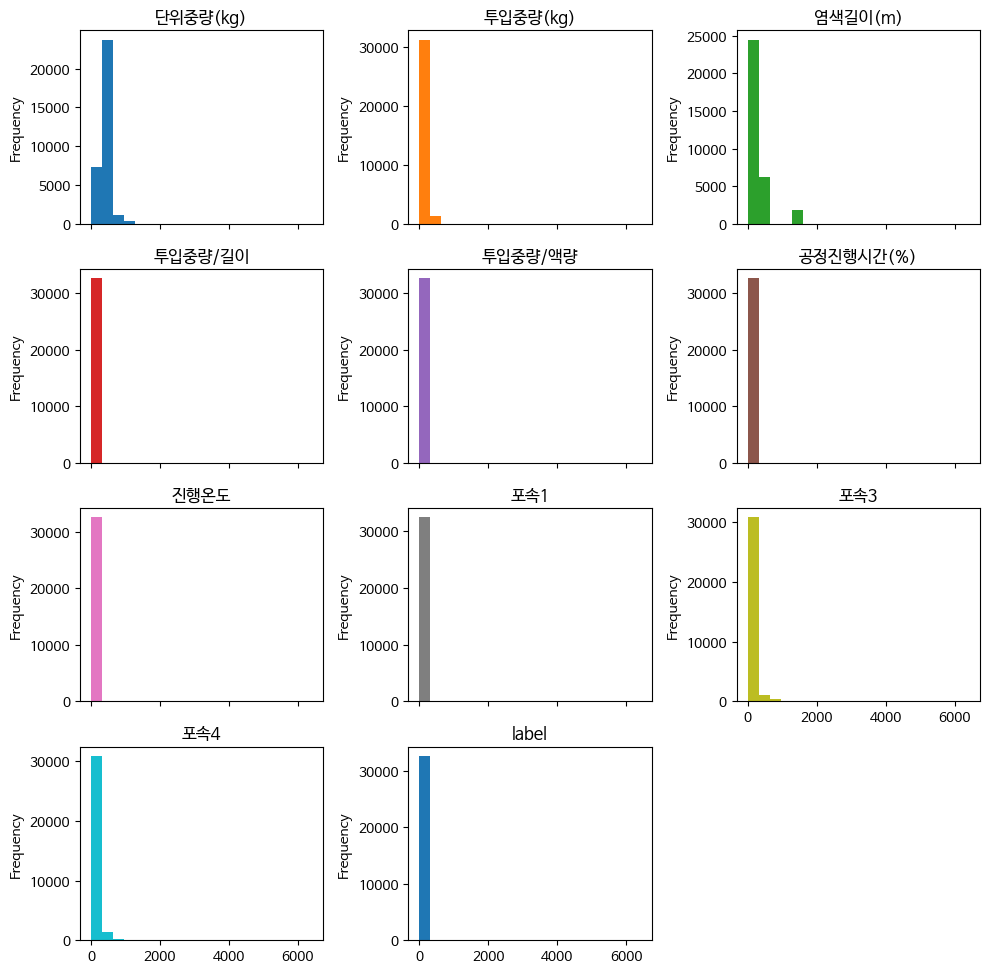

In [ ]:
df4.plot(kind='hist', bins=20, figsize=(10,12), subplots=True, layout=(5,3),
legend=False, title=list(df4.describe().columns))
plt.tight_layout()

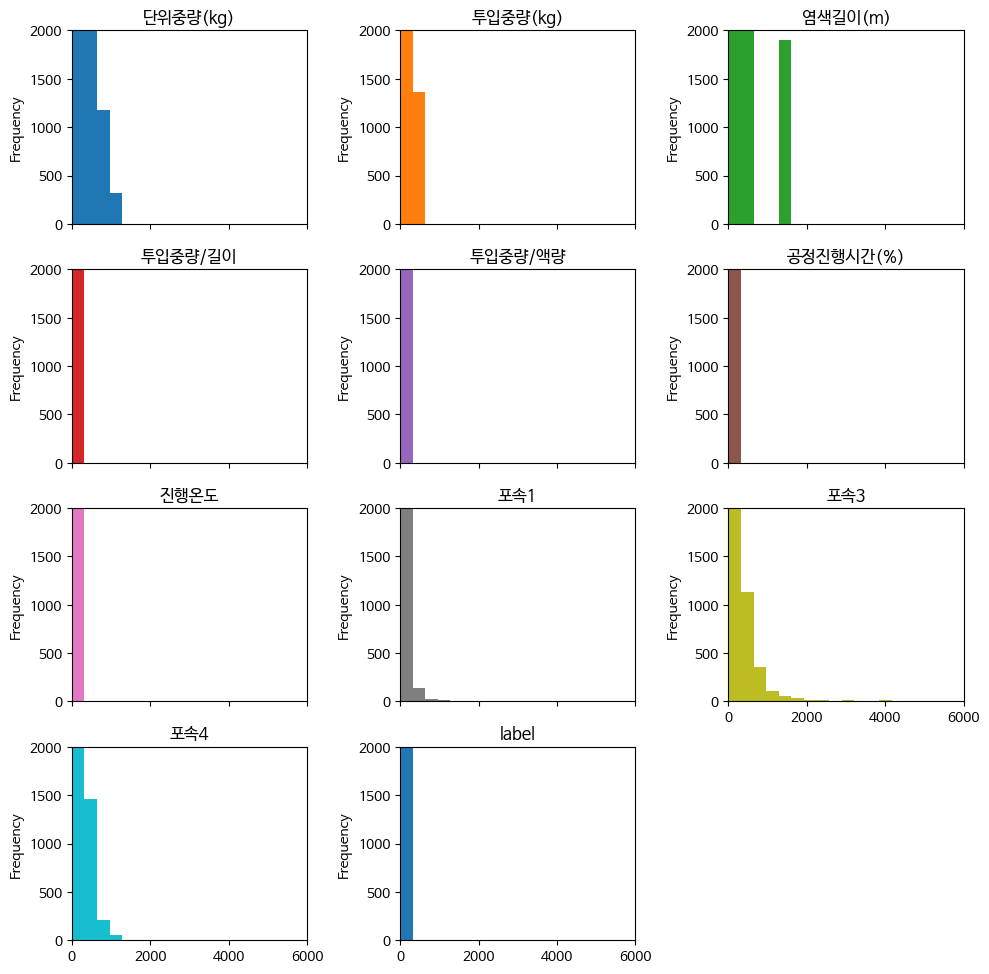

In [ ]:
# y축 조절 예시
df4.plot(kind='hist', bins=20, xlim=(0,6000), ylim=(0,2000), figsize=(10,12), subplots=True, layout=(5,3),
legend=False, title=list(df4.describe().columns))
plt.tight_layout()

박스플롯

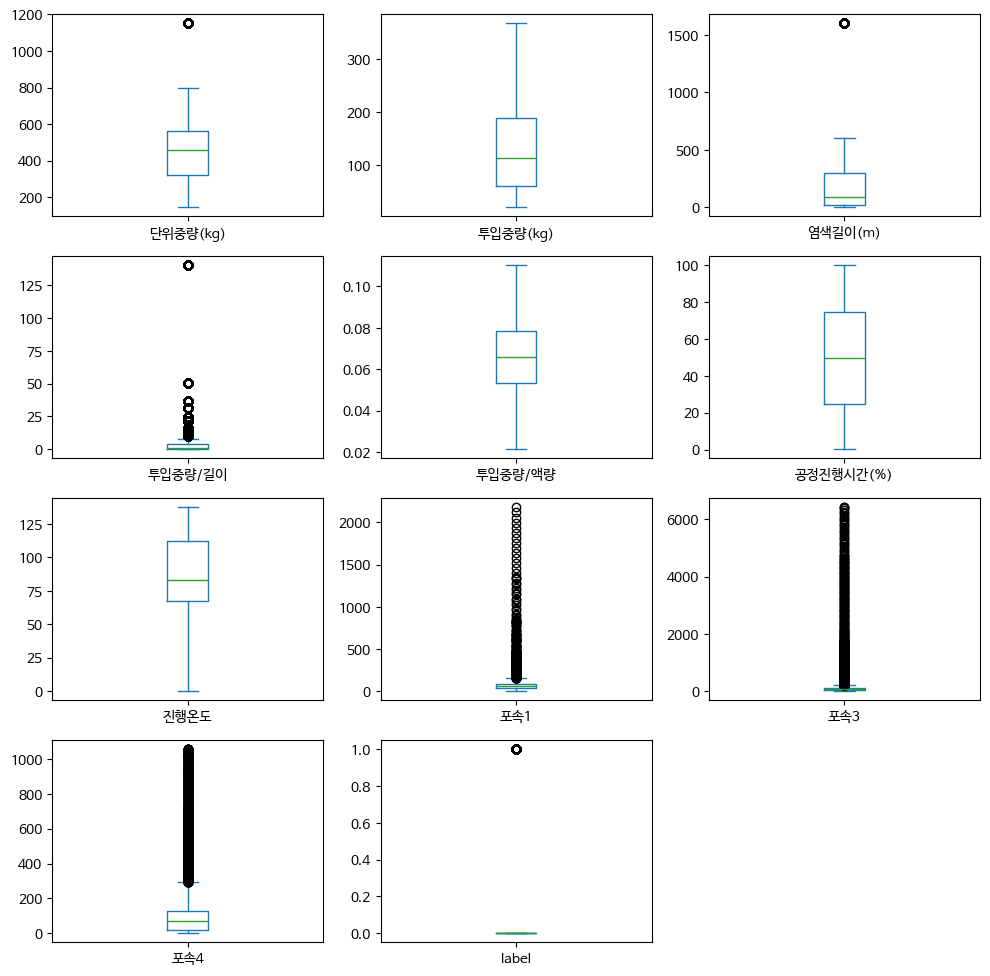

In [ ]:
df4.plot(kind='box', figsize=(10,12), subplots=True, layout=(5,3))
plt.tight_layout()

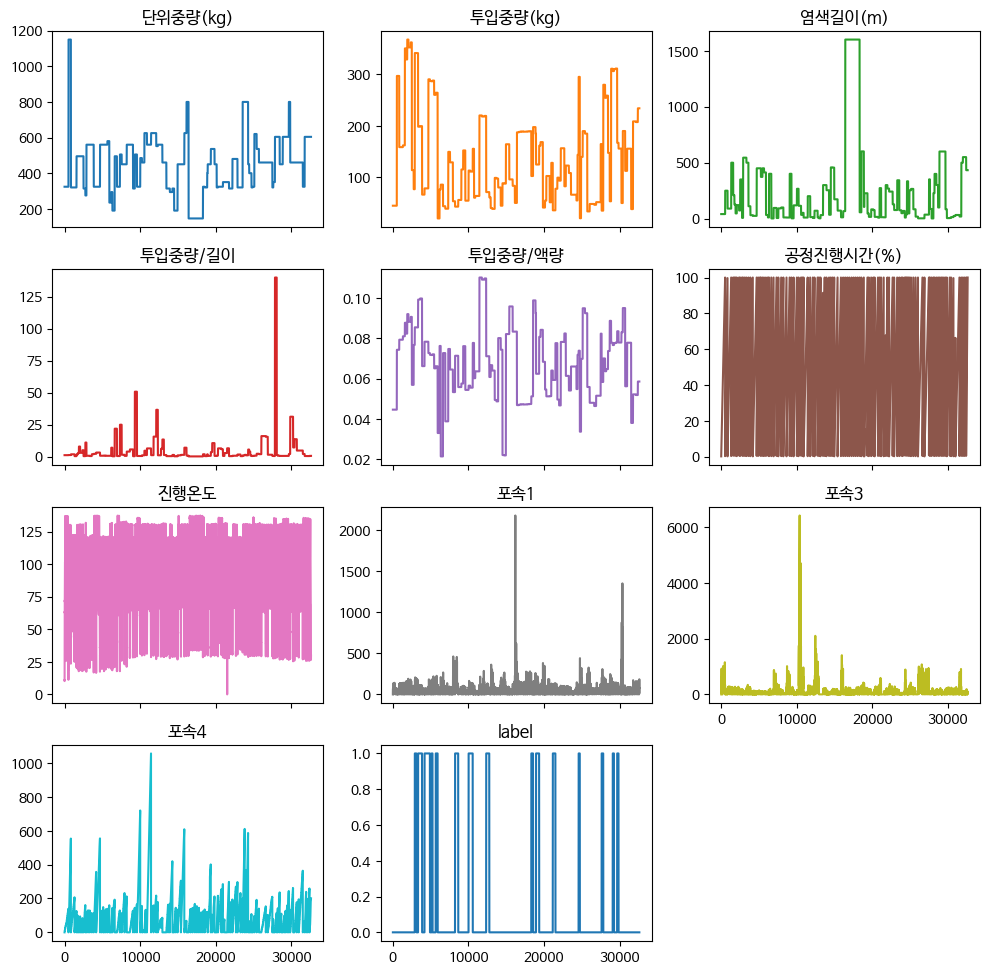

In [ ]:
# LOT번호 및 공정진행시간 순으로 재정렬
df4.sort_values(by=['LOT번호', '공정진행시간(%)'], ascending=True, inplace=True, ignore_index=True)
# 트렌드 차트 그리기
df4.plot(kind='line', figsize=(10,12), subplots=True, layout=(5,3),
legend=False, title=list(df4.describe().columns))
plt.tight_layout()